In [1]:
# import libraries
import numpy as np

Linear regression model

In [2]:
class Linear_Regression:
    # initiating the parameters
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self,X,Y): 
        # no of features and training examples
        self.m,self.n = X.shape # no. of rows and columns
        # initiating the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X=X
        self.Y = Y

        # implementing the gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    
    def update_weights(self):
        Y_prediction = self.predict(self.X)

        # update weights

        dw = -(2*(self.X.T).dot(self.Y - Y_prediction))/self.m

        db = -(2*np.sum(self.Y-Y_prediction))/self.m

        # updating the weights
        self.w = self.w - self.learning_rate*dw

        self.b = self.b - self.learning_rate*db
    
    def predict(self,X):
        return X.dot(self.w) + self.b

Implementing the model

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data processing

In [4]:
salary_df = pd.read_csv('../Datasets/salary_data.csv')

In [5]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salary_df.shape

(30, 2)

In [7]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [17]:
X = salary_df.iloc[:,:-1].values      
Y = salary_df.iloc[:,1].values

In [18]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [19]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [20]:
# splitting the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=3)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(30, 1) (20, 1) (10, 1)


Model implement

In [47]:
model = Linear_Regression(learning_rate=0.015,no_of_iterations=10000)

In [48]:
model.fit(X_train,Y_train)

In [49]:
# printing the parameter values

print('weight = ',model.w[0])
print('bias = ',model.b)

weight =  9460.965440766655
bias =  26499.153186114338


Salary = 9461x + 26499.152

Predict test data

In [50]:
test_predict = model.predict(X_test)

Visualizing the actual and predicted data

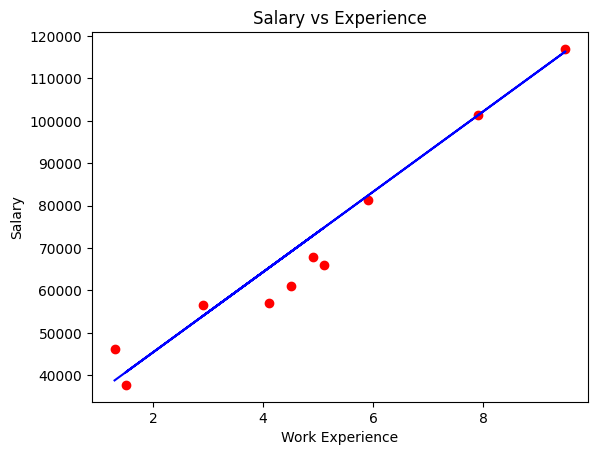

In [51]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_predict,color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [55]:
input = 10.5
input_np = np.asarray(input)
input_reshape = input_np.reshape(1,-1)

prediction = model.predict(input_reshape)
print(prediction)

[125839.29031416]
